In [15]:
# Dependencies
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
# Read CSV
csv_path ='./raw_data/clinicaltrial_data.csv'
clinical_data = pd.read_csv(csv_path, encoding='ISO-8859-1')


In [17]:
# Read CSV
csv_path ='./raw_data/mouse_drug_data.csv'
mousedrug_data = pd.read_csv(csv_path, encoding='ISO-8859-1')

In [18]:
clinical_trial=clinical_data.merge (mousedrug_data, how='outer')
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Tumor Response to Treatment

In [19]:
tumor_resp=clinical_trial.drop(['Metastatic Sites'],  
                               axis=1).groupby(['Drug','Timepoint']
                                              ).mean()
tumor_resp

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [20]:
cap_tumor_resp=tumor_resp.loc[['Capomulin']]
cap_tumor_resp.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [21]:
pvt_tumor_resp=tumor_resp.pivot_table(tumor_resp,index='Timepoint',columns=['Drug'])
pvt_tumor_resp=pvt_tumor_resp.xs('Tumor Volume (mm3)', axis=1)
pvt_tumor_resp

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [23]:
markers=sorted(Line2D.filled_markers)

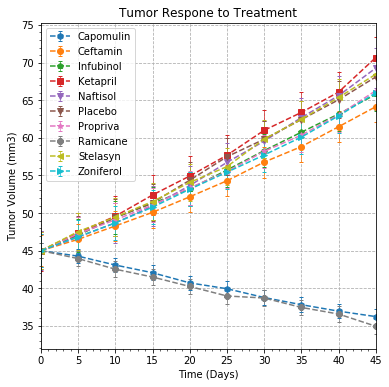

In [25]:
markers=sorted(Line2D.filled_markers)

fig, ax=plt.subplots(figsize=(6,6), linewidth=0.1)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Time (Days)')
ax.set_title('Tumor Respone to Treatment')
ax.minorticks_on()
ax.set_xlim(0, 45)
ax.grid(True,linestyle='dashed')
m=0
for col in pvt_tumor_resp.columns:
    try:
        ms= '--' + markers[i]; i=i+1
    except:
        i=0
        
    sem=[s.sem() for s in [pvt_tumor_resp[col]]]
    ax.errorbar(pvt_tumor_resp.index,pvt_tumor_resp[col], yerr= sem[0], 
                fmt=ms, capthick=1, capsize=2, elinewidth=0.7 )
plt.legend(loc=2)
plt.show()
#pvt_tumor_resp[col]

### Metastatic Response to Treatment

In [26]:
Meta_resp=clinical_trial.drop(['Tumor Volume (mm3)'],  
                               axis=1).groupby(['Drug','Timepoint']
                                              )

In [27]:
Meta_resp=clinical_trial.drop(['Tumor Volume (mm3)'],  
                               axis=1).groupby(['Drug','Timepoint']
                                              ).mean()
Meta_resp.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [28]:
pvt_Meta_resp=Meta_resp.pivot_table(Meta_resp,index='Timepoint',columns=['Drug'])
pvt_Meta_resp=pvt_Meta_resp.xs('Metastatic Sites', axis=1)
pvt_Meta_resp.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


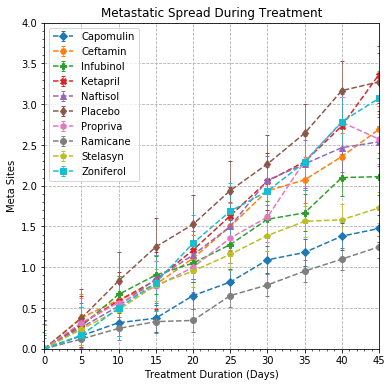

In [29]:
fig, ax=plt.subplots(figsize=(6,6), linewidth=0.1)
ax.set_ylabel('Meta Sites')
ax.set_xlabel('Treatment Duration (Days)')
ax.set_title('Metastatic Spread During Treatment')
ax.minorticks_on()
ax.set_xlim(0, 45)
ax.set_ylim(0,4)
ax.grid(True,linestyle='dashed')
m=0
for col in pvt_Meta_resp.columns:
    try:
        ms= '--' + markers[i]; i=i+1
    except:
        i=0
        
    sem=[s.sem() for s in [pvt_Meta_resp[col]]]
    ax.errorbar(pvt_Meta_resp.index,pvt_Meta_resp[col], yerr= sem[0], 
                fmt=ms, capthick=1, capsize=2, elinewidth=0.7 )
plt.legend(loc=2)
plt.show()

### Survival Rates

In [30]:
sur_resp=clinical_trial.drop(['Tumor Volume (mm3)', 'Metastatic Sites'],  
                               axis=1).groupby(['Drug','Timepoint']
                                              ).count()
sur_resp.head(5)
#clinical_trial['Mouse ID']

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [31]:
pvt_sur_resp=sur_resp.pivot_table(sur_resp,index='Timepoint',columns=['Drug'])
pvt_sur_resp=pvt_sur_resp.xs('Mouse ID', axis=1)
pvt_sur_resp.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


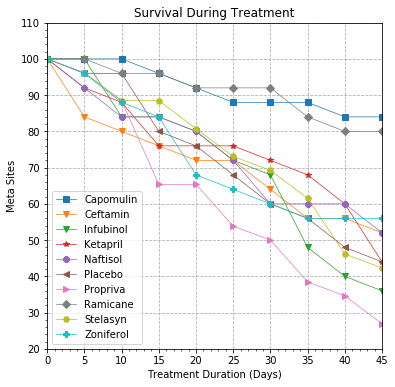

In [52]:
fig, ax=plt.subplots(figsize=(6,6), linewidth=0.1)
ax.set_ylabel('Meta Sites')
ax.set_xlabel('Treatment Duration (Days)')
ax.set_title('Survival During Treatment')
ax.minorticks_on()
ax.set_xlim(0, 45)
ax.set_ylim(20,110)
ax.grid(True,linestyle='dashed')
m=0
for col in pvt_sur_resp.columns:
    try:
        ms= markers[i]; i=i+1
    except:
        i=0
        
    sem=[s.sem() for s in [pvt_sur_resp[col]]]
    ax.plot(pvt_sur_resp.index,((pvt_sur_resp[col]/pvt_sur_resp[col][0])*100), 
                marker=ms, linewidth=0.7 )
plt.legend(loc=3)
plt.show()

In [131]:
for col in pvt_tumor_resp.columns:
    _value = pvt_tumor_resp[col]

    per_diff=[col,(_value[_value.index[(len(pvt_tumor_resp[col]))-1]]-_value[0])/_value[0]*100]

    print(per_diff)
    

['Capomulin', -19.475302667894155]
['Ceftamin', 42.516491855897414]
['Infubinol', 46.123471727851843]
['Ketapril', 57.028794686606041]
['Naftisol', 53.923347134769195]
['Placebo', 51.297960483151527]
['Propriva', 47.241174863206339]
['Ramicane', -22.320900462766659]
['Stelasyn', 52.085134287898995]
['Zoniferol', 46.579750865095221]
